# What is Groupby in Pandas?

Hi Guys, Welcome to [Tirendaz Academy](https://youtube.com/c/tirendazacademy) 😀
</br>
In this notebook, I'm going to show the groupby method in Pandas.
</br>
Happy Learning 🐱‍🏍 

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.DataFrame(
    {"key1":list("aabbab"),
     "key2":["one","two","three"]*2,
     "data1":np.random.randn(6),
     "data2":np.random.randn(6)})
df

,key1,key2,data1,data2
0,a,one,2.151827,1.495032
1,a,two,-0.487813,-0.084666
2,b,three,0.547705,0.605679
3,b,one,1.081165,-0.353946
4,a,two,0.831665,-0.431025
5,b,three,0.197081,0.301316


In [3]:
group=df["data1"].groupby(df["key1"])  #agrupa los datos de data 1 por key

In [14]:
group

In [15]:
group.mean()

key1
a    0.831893
b    0.608650
Name: data1, dtype: float64

In [16]:
ave=df["data1"].groupby([df["key1"],
                         df["key2"]]).mean() #agrupa los datos de data 1 por key1 y key2 y hace la media
ave

key1  key2 
a     one      2.151827
      two      0.171926
b     one      1.081165
      three    0.372393
Name: data1, dtype: float64

In [17]:
ave.unstack() #forma una tabla con los datos de key2 como columnas

key2,one,three,two
key1,,,
a,2.151827,NaN,0.171926
b,1.081165,0.372393,NaN


In [19]:
df.groupby("key1").mean() #no entiendo



AttributeError: 'DataFrame' object has no attribute 'group'

In [9]:
df.groupby(["key1","key2"]).mean()  #agrupa los datos por key1 y key2 y hace la media

data1     data2
key1 key2                     
a    one    0.128979  0.903436
     two   -0.656807  0.243476
b    one    2.135132 -0.996191
     three -0.335856 -0.324653

## Iterating over Groups

In [22]:
for name, group in df.groupby("key1"): #imprime los datos agrupados por key1
    print(name)
    print(group) 

a
  key1 key2     data1     data2
0    a  one  2.151827  1.495032
1    a  two -0.487813 -0.084666
4    a  two  0.831665 -0.431025
b
  key1   key2     data1     data2
2    b  three  0.547705  0.605679
3    b    one  1.081165 -0.353946
5    b  three  0.197081  0.301316


In [23]:
for (x1,x2),group in df.groupby(["key1",
                                 "key2"]): #imprime los datos agrupados por key1 y key2
    print(x1,x2)
    print(group)

a one
  key1 key2     data1     data2
0    a  one  2.151827  1.495032
a two
  key1 key2     data1     data2
1    a  two -0.487813 -0.084666
4    a  two  0.831665 -0.431025
b one
  key1 key2     data1     data2
3    b  one  1.081165 -0.353946
b three
  key1   key2     data1     data2
2    b  three  0.547705  0.605679
5    b  three  0.197081  0.301316


In [24]:
piece=dict(list(df.groupby("key1"))) #crea un diccionario con los datos agrupados por key1

In [25]:
piece["a"] #imprime los datos de key1=a

,key1,key2,data1,data2
0,a,one,2.151827,1.495032
1,a,two,-0.487813,-0.084666
4,a,two,0.831665,-0.431025


## Selecting a Column or Subset of Columns

In [26]:
df.groupby(['key1', 
            'key2'])[['data1']].mean() #agrupa los datos por key1 y key2 y hace la media de data1

data1
key1 key2           
a    one    2.151827
     two    0.171926
b    one    1.081165
     three  0.372393

## Grouping with Dicts and Series

In [27]:
fruit=pd.DataFrame(np.random.randn(4,4),
                   columns=list("abcd"),
                   index=["apple","cherry",
                          "banana","kiwi"]) #crea un dataframe con datos aleatorios
fruit

,a,b,c,d
apple,0.508255,-0.932132,0.042360,-0.286081
cherry,-0.525460,-1.624222,0.091484,0.393443
banana,1.732453,0.342012,0.053884,-0.542366
kiwi,-0.844223,1.326736,0.688268,0.094277


In [28]:
label={"a": "green","b":"yellow",
       "c":"green","d":"yellow",
       "e":"purple"} #crea un diccionario con los colores de las frutas

In [29]:
group=fruit.groupby(label,axis=1) #agrupa los datos por color

C:\Users\javie\AppData\Local\Temp\ipykernel_19676\1554457867.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  group=fruit.groupby(label,axis=1)


In [30]:
group.sum() #suma los datos agrupados por color

,green,yellow
apple,0.550615,-1.218213
cherry,-0.433977,-1.230779
banana,1.786337,-0.200354
kiwi,-0.155955,1.421012


In [31]:
s=pd.Series(label) #crea una serie con los colores de las frutas
s

a     green
b    yellow
c     green
d    yellow
e    purple
dtype: object

In [32]:
fruit.groupby(s,axis=1).count() #cuenta los datos agrupados por color

C:\Users\javie\AppData\Local\Temp\ipykernel_19676\2731039387.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  fruit.groupby(s,axis=1).count()


,green,yellow
apple,2,2
cherry,2,2
banana,2,2
kiwi,2,2


## Grouping with Functions

In [33]:
fruit.groupby(len).sum() #agrupa los datos por longitud de las frutas y suma

,a,b,c,d
4,-0.844223,1.326736,0.688268,0.094277
5,0.508255,-0.932132,0.042360,-0.286081
6,1.206993,-1.282210,0.145368,-0.148923


## Grouping by Index Levels

In [34]:
data=pd.DataFrame(np.random.randn(4,5),
                  columns=[list("AAABB"),
                           [1,2,3,1,2]]) #crea un dataframe con datos aleatorios

In [35]:
data.columns.names=["letter","number"] #pone nombre a las columnas
data

letter         A                             B          
number         1         2         3         1         2
0      -0.721546 -0.847531  1.417852  0.218740  0.336698
1      -0.325602 -2.948532 -0.653888 -0.305327  0.122940
2       0.823239  1.955351  0.739069 -0.542593  0.080989
3      -1.158528 -0.203205  0.209244 -1.236226  1.009336

In [36]:
data.groupby(level="letter",axis=1).sum() #agrupa los datos por letra y suma

C:\Users\javie\AppData\Local\Temp\ipykernel_19676\249029581.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level="letter",axis=1).sum()


letter,A,B
0,-0.151225,0.555438
1,-3.928022,-0.182386
2,3.517660,-0.461605
3,-1.152489,-0.226891


## Application with Real Data Set 

In [38]:
game=pd.read_csv("DataSets/vgsalesGlobale.csv") 

In [39]:
game.head() #imprime los primeros datos

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [40]:
game.dtypes #imprime los tipos de datos

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [41]:
game.dropna().describe() #elimina los datos nulos y describe los datos

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [42]:
game.Global_Sales.mean() #calcula la media de las ventas globales

np.float64(0.5374406555006628)

In [43]:
group=game.groupby("Genre") #agrupa los datos por genero

In [44]:
group["Global_Sales"].count() #cuenta las ventas globales por genero

Genre
Action          3316
Adventure       1286
Fighting         848
Misc            1739
Platform         886
Puzzle           582
Racing          1249
Role-Playing    1488
Shooter         1310
Simulation       867
Sports          2346
Strategy         681
Name: Global_Sales, dtype: int64

In [45]:
group["Global_Sales"].describe() #describe las ventas globales por genero

,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
Action,3316.0,0.528100,1.156427,0.01,0.07,0.190,0.5000,21.40
Adventure,1286.0,0.185879,0.513280,0.01,0.02,0.060,0.1600,11.18
Fighting,848.0,0.529375,0.955965,0.01,0.08,0.210,0.5500,13.04
Misc,1739.0,0.465762,1.314886,0.01,0.06,0.160,0.4100,29.02
Platform,886.0,0.938341,2.585254,0.01,0.09,0.280,0.7900,40.24
Puzzle,582.0,0.420876,1.561716,0.01,0.04,0.110,0.3075,30.26
Racing,1249.0,0.586101,1.662437,0.01,0.07,0.190,0.5300,35.82
Role-Playing,1488.0,0.623233,1.707909,0.01,0.07,0.185,0.5225,31.37
Shooter,1310.0,0.791885,1.817263,0.01,0.08,0.230,0.7275,28.31


In [46]:
game[game.Genre=="Action"].Global_Sales.mean() #calcula la media de las ventas globales del genero accion

np.float64(0.5281001206272617)

In [47]:
group.mean() 

TypeError: agg function failed [how->mean,dtype->object]

In [35]:
%matplotlib inline  #permite graficar en jupyter

<AxesSubplot:xlabel='Genre'>

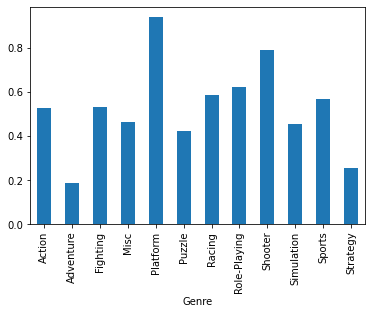

In [36]:
group["Global_Sales"].mean().plot(kind="bar") #grafica la media de las ventas globales por genero

<AxesSubplot:xlabel='Genre'>

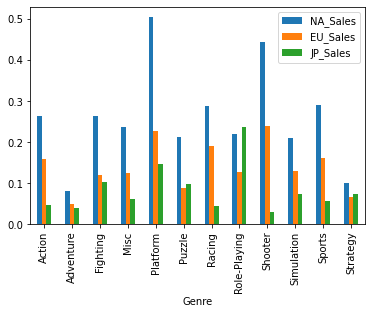

In [37]:
group[["NA_Sales",
       "EU_Sales",
       "JP_Sales"]].mean().plot(kind="bar") #grafica la media de las ventas por region

Don't forget to follow us on [YouTube](http://youtube.com/tirendazacademy) | [Medium](http://tirendazacademy.medium.com) | [Twitter](http://twitter.com/tirendazacademy) | [GitHub](http://github.com/tirendazacademy) | [Linkedin](https://www.linkedin.com/in/tirendaz-academy) | [Kaggle](https://www.kaggle.com/tirendazacademy) 😎